# Proyecto Integrado 1

Trabajamos para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tenemos que identificar patrones que determinen si un juego tiene éxito o no. Esto nos permitirá detectar proyectos prometedores y planificar campañas publicitarias. 

Tenemos a nuestra disposición datos que se remontan al 2016, necesitamos analizarlos para planeación de una campaña para 2017. El dataset contiene la abreviatura ESRB. The Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

## Inicialización

Para inicar nuestro proyecto vamos a cargar nuestras librerias

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats as st

## Cargar los datos

Vamos a cargar los datos del dataset `games.csv`

In [2]:
# Carga el archivo de datos
data = pd.read_csv('data/games.csv')

## Preparar los datos

Vamos a ver la composición de nuestro dataset y si hay algún error, corregirlo y enriquecer el dataset de ser posible.

In [3]:
# Imprimimos la información general/resumen sobre nuestro dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Se imprime una muestra de los datos
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
# Se imprime una descripción estadistica de los datos
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


En el dataset podemos ver la información historica de videojuegos, entre ellos:

1. El nombre del juego `Name`
2. La plataforma en la que se puede jugar `Platform`
3. El año que se estreno `Year_of_Release`
4. El género de videojuego `Genre`
5. Las ventas en Norteamérica en millones de dólares estadounidenses `NA_sales`
6. Las ventas en Europa en millones de dólares estadounidenses `EU_sales`
7. Las ventas en Japón en millones de dólares estadounidenses `JP_sales`
8. Las ventas en otros países en millones de dólares estadounidenses `Other_sales`
9. La calificación media de la crítica `Critic_Score`
10. La calificación media de los usuarios `User_Score`
11. La clasificación del vieojuego dada por la ESRB `Rating`

Al ver la muestra del dataset y su resumen, podemos notar que hay que hacer las siguientes ajustes:

- Reemplaza los nombres de las columnas a minusculas, esto con el objetivo de unificar los nombres
- Necesitamos convertir el tipo de la columna User_Score a float ya que esta como object
- Se necesita cambiar el tipo de Year_of_Release a int en vez de float
- Hay valores ausentes y tenemos que indagar el porque de ellos y en caso de necesitar ser rellenados, ver que opción es la mejor para ello
- Tenemos una presencia fuerte de outliers en nuestro dataset, en especifico en nuestras ventas por regiones (`NA_sales`, `EU_sales`, `JP_sales`, `Other_sales`)

### Corregir datos

Empecemos haciendo el cambio de tipos en los datos y el ajuste en el nombre de las columnas

In [6]:
# Cambiamos los nombres a minusculas

data.columns = data.columns.str.lower()

# Imprimimos los nombres para verificar el cambio

data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
# Checamos los valores de la columna 'user_score'
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Como podemos notar, en nuestra columna de user_score tenemos un valor de tbd, este valor string no nos permitiria cambiar el tipo de nuestra columna a uno númerico. Este valor que significa que la calificación esta a determinar y debido a esto podemos tratar estos datos como nulos y más adelante cuando tratemos todos esos datos, podemos ver si podemos rellenarlos de alguna manera o dejarlos asi al final

In [8]:
# Convertimos el tipo de la columna user_score
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

# Imprimimos el resumen para verificar el cambio
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Con estos ajustes, nuestros nombres de columnas ya quedaron unificados y nuestra columna `user_score` fue pasada a numerica y podemos realizar calculos y agrupaciones para nuestro análisis posterior

### Datos ausentes

A continuación checaremos las siguientes columnas que presentan datos nulos y que opciones tenemos para tratar con ellos:

- `name`
- `year_of_release`
- `genre`
- `critic_score`
- `user_score`
- `rating`

Empezamos con la columna `name`. Esta columna tiene 2 valores ausentes, por lo que podemos imprimir estas dos filas y ver su situación

In [9]:
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Como podemos ver, estas 2 filas tambien presentan datos vacios en las columnas de `genre`, `critic_score`, `user_score` y `rating`. Debido a que la unica información para identificar estos juegos son la plataforma y el año, no es posible identificarlo y su información no podria ser de utilidad. Se toma la decisión de eliminar estos datos y con ello liberar de datos ausentes la columna `name` y también la columna `genre`

In [10]:
# Eliminamos las filas con ausentes
data = data[data['name'].notnull()]

# Comprobamos que las columnas ya no tengan vacios
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Las columnas `name` y `genre` han quedado libres de datos ausentes.

Pasemos a la columna de `year_of_release`

In [11]:
print(data[data['year_of_release'].isnull()].head(10))
print()
print('% de juegos sin año:', ((data.year_of_release.isnull().sum() / len(data)) * 100))

                                            name platform  year_of_release  \
183                              Madden NFL 2004      PS2              NaN   
377                             FIFA Soccer 2004      PS2              NaN   
456                   LEGO Batman: The Videogame      Wii              NaN   
475                   wwe Smackdown vs. Raw 2006      PS2              NaN   
609                               Space Invaders     2600              NaN   
627                                    Rock Band     X360              NaN   
657     Frogger's Adventures: Temple of the Frog      GBA              NaN   
678  LEGO Indiana Jones: The Original Adventures      Wii              NaN   
719                               Call of Duty 3      Wii              NaN   
805                                    Rock Band      Wii              NaN   

         genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
183     Sports      4.26      0.26      0.01         0.71         

Al ver una muestra de los datos vacios, podemos observar que algunos juegos tienen el año en el titulo. Podemos ocupar esto para rellenar nuestros datos. Algo a tomar en cuenta es que ese año que se muestra no es el del lanzamiento, el lanzamiento del videojuego es un año antes.

In [12]:
# Genereamos una función que saque el año de los titulos, checa si es un numero y de ser asi la ocupa para rellenar la fila

def extract_year(row):
    name = row['name']
    year = row['year_of_release']
    name_extract = name.split(' ')[-1]
    if np.isnan(year):
        try:
            año = float(name_extract)
            año = año - 1
            if año > 1900:  
                return año
            else:
                return float("nan")
        except:
            return float("nan")
    else:
        return year

In [13]:
# Creamos un dataset de prueba para la función

data_prueba = {'name':['LEGO Batman: The Videogame', 'Madden NFL 2004', 'Call of Duty 3', 'wwe Smackdown vs. Raw 2006'], 'year_of_release':[2008, float('nan'), float('nan'), float('nan')]}
 
# Create DataFrame
df_prueba = pd.DataFrame(data_prueba)
df_prueba

,name,year_of_release
0,LEGO Batman: The Videogame,2008.0
1,Madden NFL 2004,NaN
2,Call of Duty 3,NaN
3,wwe Smackdown vs. Raw 2006,NaN


In [14]:
# Aplicamos la función al dataset de prueba para ver los resultados
df_prueba['year_of_release'] = df_prueba.apply(extract_year, axis=1)
df_prueba

,name,year_of_release
0,LEGO Batman: The Videogame,2008.0
1,Madden NFL 2004,2003.0
2,Call of Duty 3,NaN
3,wwe Smackdown vs. Raw 2006,2005.0


In [15]:
# Checamos cuantos nulos son antes de aplicar la función
print('% de juegos sin año:', ((data.year_of_release.isnull().sum() / len(data)) * 100))

# Aplicamos la función al dataset
data['year_of_release'] = data.apply(extract_year, axis=1)

# Checamos cuantos nulos nos quedan despues de aplicar la función
print('% de juegos sin año:', ((data.year_of_release.isnull().sum() / len(data)) * 100))

% de juegos sin año: 1.6095255190570215
% de juegos sin año: 1.5197750254293065


Logramos reducir los nulos a 1.51% de los datos de la columna. Viendo que no podemos generar más años con los datos disponibles y que el porcentaje de nulos es menor al 5%, se toma la decisión de eliminar estos datos del dataset.

In [16]:
# Eliminamos los datos del dataset
data = data[data['year_of_release'].notnull()]

# Pasaremos los datos a int para poder tener un mejor manejo de ellos
data.year_of_release = data.year_of_release.apply(int)

# Verificamos que ya no haya datos vacios
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16459 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16459 non-null  object 
 1   platform         16459 non-null  object 
 2   year_of_release  16459 non-null  int64  
 3   genre            16459 non-null  object 
 4   na_sales         16459 non-null  float64
 5   eu_sales         16459 non-null  float64
 6   jp_sales         16459 non-null  float64
 7   other_sales      16459 non-null  float64
 8   critic_score     7994 non-null   float64
 9   user_score       7472 non-null   float64
 10  rating           9778 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


La columna `year_of_release` ha quedado libre de datos ausentes.

Pasemos a la columna `critic_score`

In [17]:
print(data[data['critic_score'].isnull()].head(10))
print()
print('% de juegos sin score de la critica:', ((data.critic_score.isnull().sum() / len(data)) * 100))

                             name platform  year_of_release         genre  \
1               Super Mario Bros.      NES             1985      Platform   
4        Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                          Tetris       GB             1989        Puzzle   
9                       Duck Hunt      NES             1984       Shooter   
10                     Nintendogs       DS             2005    Simulation   
12    Pokemon Gold/Pokemon Silver       GB             1999  Role-Playing   
18              Super Mario World     SNES             1990      Platform   
20  Pokemon Diamond/Pokemon Pearl       DS             2006  Role-Playing   
21               Super Mario Land       GB             1989      Platform   
22            Super Mario Bros. 3      NES             1988      Platform   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  
1      29.08      3.58      6.81         0.77           NaN         NaN

Como podemos ver, los datos ausentes en esta columna representa el 51% de nuestros datos totales, son demasiados para eliminar estas filas. Estos datos no pueden ser rellenados por la media o mediana de los demás datos ya que cada juego es completamente independiente y mientras a uno le dan un 80 de calificación, otro en el mismo mes o año recibe un 40. Teniendo todo esto en cuenta se ha decidido no rellenar estos datos y dejarlos vacios.

Ya hemos procesado la columna `critic_score`

Pasemos a la columna `user_score`

In [18]:
print(data[data['user_score'].isnull()].head(10))
print()
print('% de juegos sin score de los usuarios:', ((data.user_score.isnull().sum() / len(data)) * 100))

                             name platform  year_of_release         genre  \
1               Super Mario Bros.      NES             1985      Platform   
4        Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                          Tetris       GB             1989        Puzzle   
9                       Duck Hunt      NES             1984       Shooter   
10                     Nintendogs       DS             2005    Simulation   
12    Pokemon Gold/Pokemon Silver       GB             1999  Role-Playing   
18              Super Mario World     SNES             1990      Platform   
20  Pokemon Diamond/Pokemon Pearl       DS             2006  Role-Playing   
21               Super Mario Land       GB             1989      Platform   
22            Super Mario Bros. 3      NES             1988      Platform   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  
1      29.08      3.58      6.81         0.77           NaN         NaN

Al igual que con la columna `critic_score` no tenemos manera de rellenar los datos con base a los demás datos no nulos, por lo que dejaremos estos datos sin rellenar.

Ya hemos procesado la columna `user_score`

Pasemos a la columna `rating`

In [19]:
print(data[data['rating'].isnull()].head(10))
print()
print('% de juegos sin clasificación', ((data.rating.isnull().sum() / len(data)) * 100))

                             name platform  year_of_release         genre  \
1               Super Mario Bros.      NES             1985      Platform   
4        Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                          Tetris       GB             1989        Puzzle   
9                       Duck Hunt      NES             1984       Shooter   
10                     Nintendogs       DS             2005    Simulation   
12    Pokemon Gold/Pokemon Silver       GB             1999  Role-Playing   
18              Super Mario World     SNES             1990      Platform   
20  Pokemon Diamond/Pokemon Pearl       DS             2006  Role-Playing   
21               Super Mario Land       GB             1989      Platform   
22            Super Mario Bros. 3      NES             1988      Platform   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  
1      29.08      3.58      6.81         0.77           NaN         NaN

Como podemos observar, los valores vacios en `rating` representan el 40% del total de la fila por lo que no podemos eliminarlos. Sin embargo, al ser una columna categorica podemos generar una nueva clasificación para estos datos nulos y asi poder identificarlos

In [20]:
# Rellenamos los valores ausentes con la categoria 'unclassified'
data['rating'] = data['rating'].fillna('unclassified')

# Verificamos que se haya rellenado bien la columna
data['rating'].value_counts()

unclassified    6681
E               3930
T               2905
M               1536
E10+            1394
EC                 8
K-A                3
AO                 1
RP                 1
Name: rating, dtype: int64

La columna `rating` ha quedado libre de datos ausentes.

Con esto paso, nuestra data esta procesada y lista para ser analizada

### Enriquecer los datos

En este último paso, vamos agregar una columna extra con las ventas totales del videojuego para poder analizarlo más adelante

In [21]:
# Creamos la nueva columna total_sales para las ventas totales
data['total_sales'] = data.na_sales + data.eu_sales + data.jp_sales + data.other_sales

# Verificamos que se haya creado bien la nueva columna
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unclassified,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unclassified,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unclassified,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unclassified,28.31


### Conclusiones intermedias

In [22]:
data = data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16459 entries, 0 to 16458
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16459 non-null  object 
 1   platform         16459 non-null  object 
 2   year_of_release  16459 non-null  int64  
 3   genre            16459 non-null  object 
 4   na_sales         16459 non-null  float64
 5   eu_sales         16459 non-null  float64
 6   jp_sales         16459 non-null  float64
 7   other_sales      16459 non-null  float64
 8   critic_score     7994 non-null   float64
 9   user_score       7472 non-null   float64
 10  rating           16459 non-null  object 
 11  total_sales      16459 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


Una vez realizado nuestro procesamiento de datos, nuestro dataset quedo con 16459 rows y 12 columnas. Se trabajaron los datos ausentes y los tipos estás correctos.

Podemos continuar con nuestro análisis

## Analizar los datos

### Lanzamientos a traves de los años y periodos

Como primer análisis, veremos cuantos juegos fueron lanzados por año y crearemos una clasificación de periodos para ver si son significativos los datos por periodo

<AxesSubplot:title={'center':'Juegos lanzados por año'}, xlabel='year_of_release'>

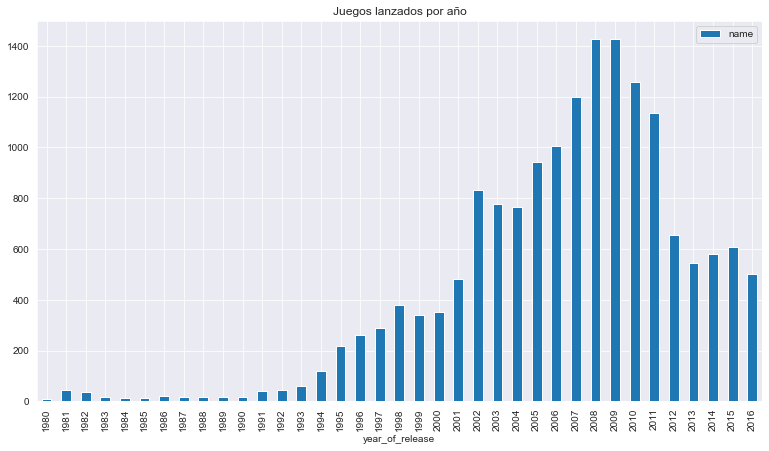

In [23]:
# Juegos lanzados por año
data.groupby('year_of_release')['name'].count().reset_index().sort_values(by='year_of_release').plot.bar(x='year_of_release', y='name', grid=True, figsize=(13,7), title='Juegos lanzados por año')

Como podemos ver en la gráfica, los años con mayores lanzamientos han sido el 2008 y el 2009 y los menores fueron el año de 1980 y 1985. (Entendible, ya que la industria apenas iniciaba)

In [24]:
# Categorizamos los años en periodos
def years_grouped(row):
    years = row['year_of_release']
    if years < 1990:
        return '80s'
    elif years < 2000:
        return '90s'
    elif years < 2010:
        return '2000-2009'
    else:
        return '2010-2016'
    
data['period'] = data.apply(years_grouped, axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,period
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,2000-2009
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unclassified,40.24,80s
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,2000-2009
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,2000-2009
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unclassified,31.38,90s


<AxesSubplot:title={'center':'Lanzamientos de videojuegos por periodo'}>

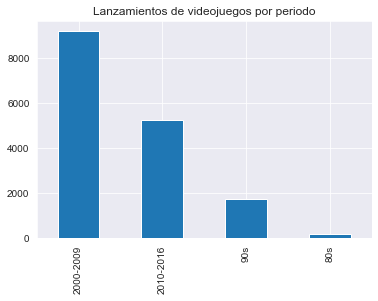

In [25]:
# Vemos los lanzamientos por periodo
data['period'].value_counts().plot.bar(title='Lanzamientos de videojuegos por periodo', grid=True)

Como podemos observar, el periodo de los 2000-2009 es en el cual se lanzaron mayor número de videojuegos, mientras que en los 80s fue en el que menos videojuegos tenemos. (Lo cual tiene mucho sentido ya que apenas empezaba la industria).

### Ventas por plataforma

Para este análisis, el objetivo es ver la variación de las ventas entre una plataforma y otra. Para esto realizaremos lo siguiente:

- Se va a identificar y elegir las plataformas con mayores ventas totales
- Se hara una distribución de estas plataformas a traves de los años
- Identificar las plataformas con mayor popularidad y analizar como han cambiado sus ventas a traves de los años.

<AxesSubplot:title={'center':'Plataformas con mayores ventas totales'}, ylabel='platform'>

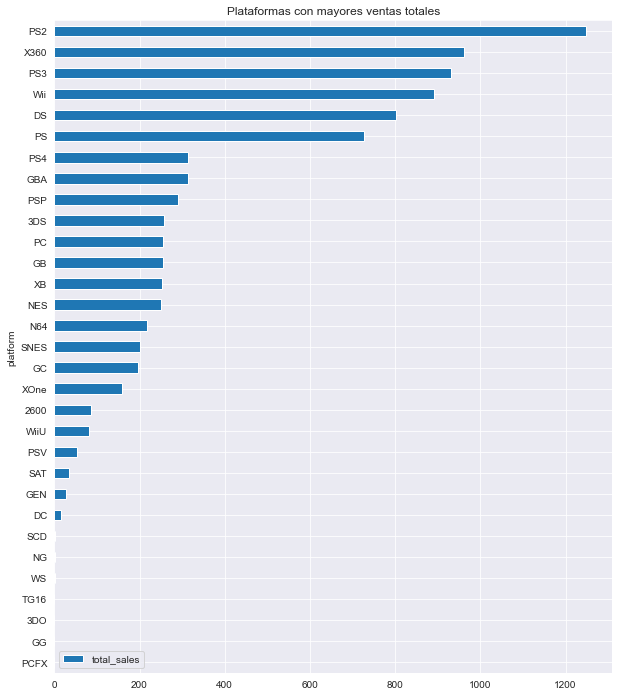

In [26]:
# Identificar las plataformas con mayores ventas
top_plataformas = data.groupby('platform')['total_sales'].sum().reset_index()
top_plataformas.sort_values(by='total_sales', ascending=True).plot.barh(x='platform',
                                                                        y='total_sales', figsize=(10,12),
                                                                        title='Plataformas con mayores ventas totales')

Como podemos observar en la gráfica, hay una gran diferencia entre los ingresos de las primeras 6 plataformas con el resto, este sera nuestro top plataformas que analizaremos.

In [27]:
# Elegimos solo el top 6 de las plataformas
data_top = data[data['platform'].isin(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'])]
data_top.platform.unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'PS'], dtype=object)

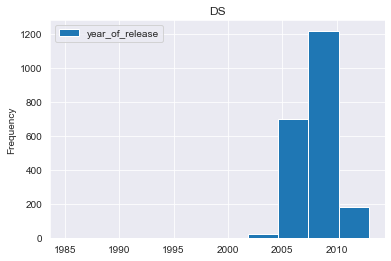

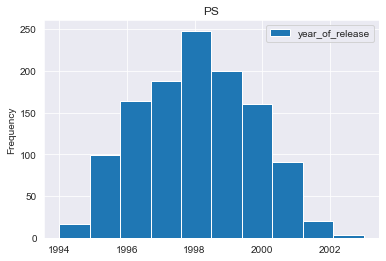

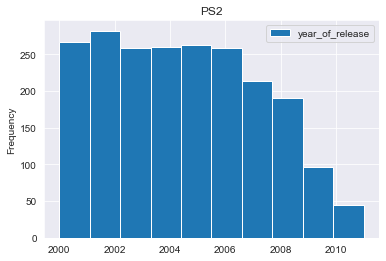

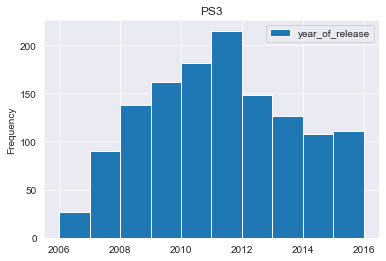

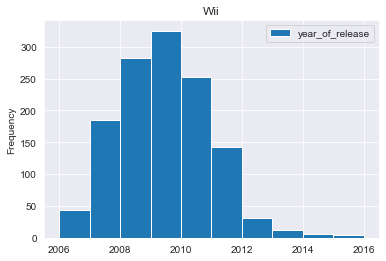

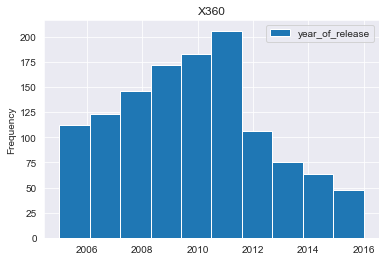

In [28]:
# Mostramos la distrubición del top plataformas a traves de los años
for platform, datos in data_top.groupby('platform'):
    datos.plot(kind='hist', y='year_of_release', title=platform)

Al ver el top plataformas en ventas y sus distribuciones a lo largo de los años, podemos generar los siguientes insights:
1. Las plataformas de Sony son de las más redituables, estando en el top 6 de nuestro ranking, en especifico en el primer, tercer y sexto puesto.
2. En general las consolas tienen un periodo de vida de 8-10 años teniendo un mayor numero de lanzamientos a la mitad de este periodo de vida.
3. La nueva generación de consolas aparece en general 2 años antes del final del periodo de vida de las consolas anteriores
4. El caso de la plataforma PS2 es diferente al resto del top, ya que desde el principio tuvo un gran lanzamiento de juegos  que se matuvo hasta 4 años antes de su salida (introducción de la PS3 al mercado).

### Selección de periodo para el modelo

Ya que nuestro objetivo es hacer una planeación para el año 2017, se deberian tomar los datos del periodo 2010-2016, en particular los últimos 3 años que han pasado (2014-2016) ya que como vimos anteriormente, las consolas tienen un periodo de 8-10 años y plataformas que tuvieron mucha actividad en el periodo del 2000-2009 ya no tendran lanzamientos para el 2017.

In [29]:
data_modelo = data.query("year_of_release >= 2014").reset_index(drop=True)
data_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
 12  period           1689 non-null   object 
dtypes: float64(7), int64(1), object(5)
memory usage: 171.7+ KB


Con esta selección, tenemos los datos de 1689 juegos para realizar nuestro análisis y modelo

### Plataformas lideres del periodo

En este apartado veremos que plataformas son las lideres en ventas y como es su crecimiento o reducción a lo largo de los años. Posterior a esto, eligiremos un top 4 de plataformas potencialmente más rentables

<AxesSubplot:title={'center':'Plataformas lideres en ventas'}, ylabel='platform'>

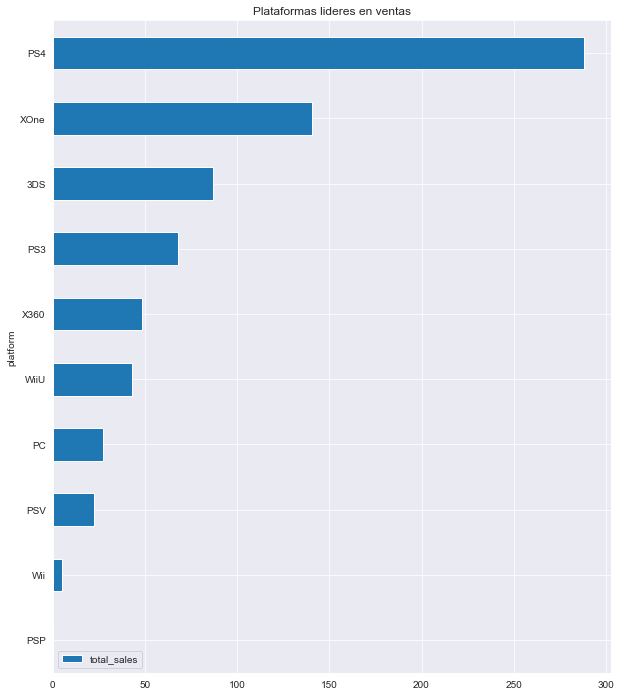

In [30]:
# Plataformas lideres
plataformas_lider = data_modelo.groupby('platform')['total_sales'].sum().reset_index()
plataformas_lider.sort_values(by='total_sales', ascending=True).plot.barh(x='platform', y='total_sales', figsize=(10,12),
                                                                          title='Plataformas lideres en ventas')

Text(0.5, 0.905, 'Distribución de ventas por plataforma a traves de los años')

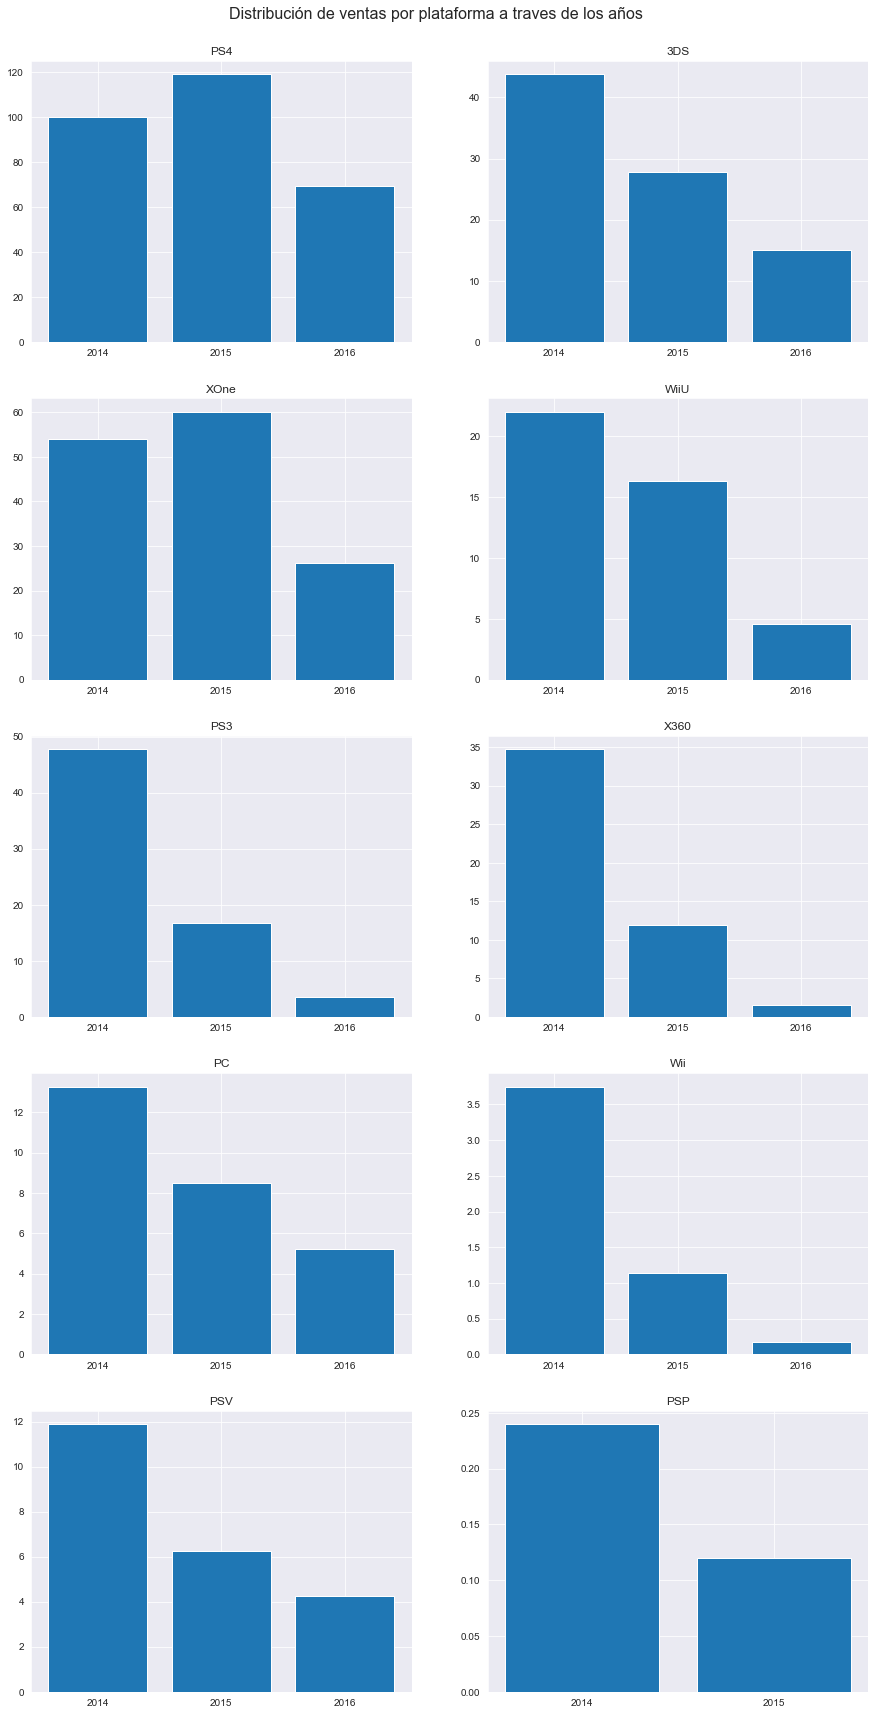

In [31]:
# Mostramos la distrubición de las ventas por plataforma a traves de los años
lista_plataformas = data_modelo.platform.unique()
data_modelo['year_of_release'] = data_modelo['year_of_release'].apply(str)
fig, axs = plt.subplots(5, 2, figsize=(15, 30))
x = 0
y = 0
for platform in lista_plataformas:
    tabla_distribucion = data_modelo[data_modelo['platform'] == platform].groupby('year_of_release')['total_sales'].sum().reset_index()
    axs[x,y].bar(tabla_distribucion['year_of_release'], tabla_distribucion['total_sales'])
    axs[x,y].set_title(platform)
    if y == 1:
        y = 0
        x += 1
    else:
        y += 1
        
fig.suptitle('Distribución de ventas por plataforma a traves de los años', y=0.905, fontsize=16)

Podemos ver con base a las graficas que las plataformas con mayores ventas en estos ultimos 3 años son PS4, XOne y 3DS. Las distribuciones sin embargo, reflejan una caida de las ventas conforme van avanzando los años, un caso particular para las plataformas de PS4 uy XOne es que tuvieron un aumento en sus ventas para el año 2015 pero para el año 2016 bajaron considerablemente.

### Ventas globales por plataforma

Para este apartado analizaremos las ventas globales de todos los juegos. Veremos por plataforma que tanta diferencia hay entre ellas y el comportamiento de las ventas promedio.

<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

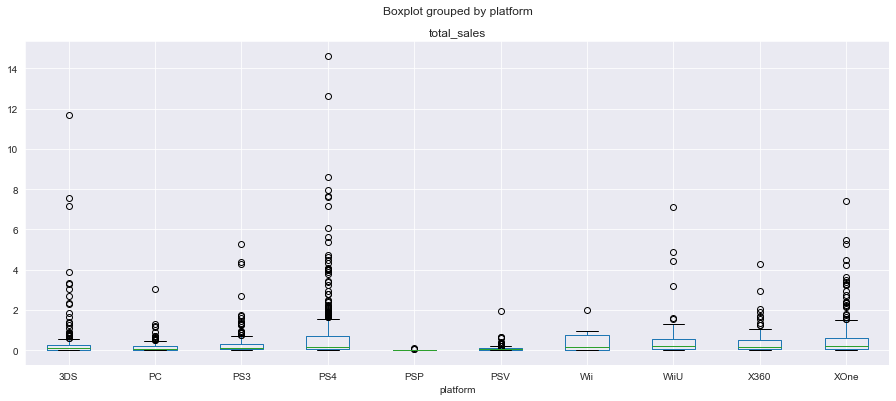

In [32]:
# Creamos un diagrama de caja de las ventas globales por plataforma
data_modelo.boxplot(column='total_sales', by='platform', figsize=(15,6))

Como podemos ver en la gráfica, realmente no hay mucha diferencia entre las ventas por plataforma, hay algunas que presentan un mayor número de ventas (por ejemplo, la PS4) pero nada muy significativo. Lo que si podemos hacer notar es el hecho de la inmensa cantidad de outliers presentes en cada plataforma. Esto nos indica que si sacaramos las ventas promedio de cada plataforma habria una gran diferencia entre ellas y que realmente no es que los juegos en promedio generen ventas enormes, si no más bien que hay juegos que generan una cantidad inmensa de dinero que suben la media más de lo que deberian.

### Correlación de las reseñas con las ventas

Para este análisis, veremos la relación que tienen las reseñas con las ventas de la plataforma XOne.

Text(0.5, 0, 'Reseñas de la critica de los usuarios')

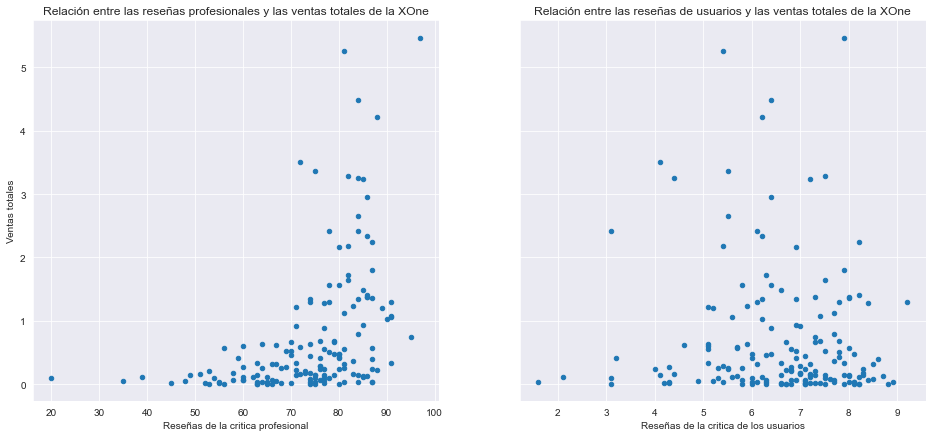

In [33]:
# Creamos un grafico de dispersión para ver la relación entre las variables
data_XOne = data_modelo[data_modelo['platform'] == 'XOne']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7), sharey=True)
data_XOne.plot(x='critic_score', y='total_sales', kind='scatter', ax=ax1)
ax1.set_title('Relación entre las reseñas profesionales y las ventas totales de la XOne')
ax1.set_xlabel('Reseñas de la critica profesional')
ax1.set_ylabel('Ventas totales')
data_XOne.plot(x='user_score', y='total_sales', kind='scatter', ax=ax2)
ax2.set_title('Relación entre las reseñas de usuarios y las ventas totales de la XOne')
ax2.set_xlabel('Reseñas de la critica de los usuarios')

In [34]:
# Sacamos la correlación de las variables
print('La correlación entre las reseñas de la critica profesional y las ventas totales son:',
      data_XOne['total_sales'].corr(data_XOne['critic_score']))
print('La correlación entre las reseñas de la critica de los usuarios y las ventas totales son:',
      data_XOne['total_sales'].corr(data_XOne['user_score']))

La correlación entre las reseñas de la critica profesional y las ventas totales son: 0.42867694370333226
La correlación entre las reseñas de la critica de los usuarios y las ventas totales son: -0.0703839280647581


Analizando los gráficos y los resultados de correlación, podemo dar las siguientes conclusiones:

- La reseña de la crítica profesional tiene una correlación positiva de 42%, esto nos indica un relación debil que a mayor score, mayores ventas. Sin embargo, esta se presenta debil ya que hay juegos que presentan una puntación de 90 y sus ventas no se disparan como uno pensaría.

- La reseña de la crítica de los usuarios tiene una correlación negativa cercana al 0% con respecto a las ventas totales, esta correlación es nula y en el grafico podemos ver esta situación, ya que hay ventas altas dispersas entre diferentes puntuaciones (desde 3 hasta el 9 de score).

- Las ventas se ven más relacionadas con la critica profesional que con la de los usuarios por lo que en caso de desarrollar un modelo, recomendamos ocupar esta variable aunque hay que tomar en cuenta que la relación no es muy fuerte y podria ocasionar variaciones importantes.

Para ver un poco más el panorama general, vamos a hacer la misma comparación de las ventas con consolas de la misma generación (PS4 y WiiU).

Text(0.5, 0, 'Reseñas de la critica de los usuarios')

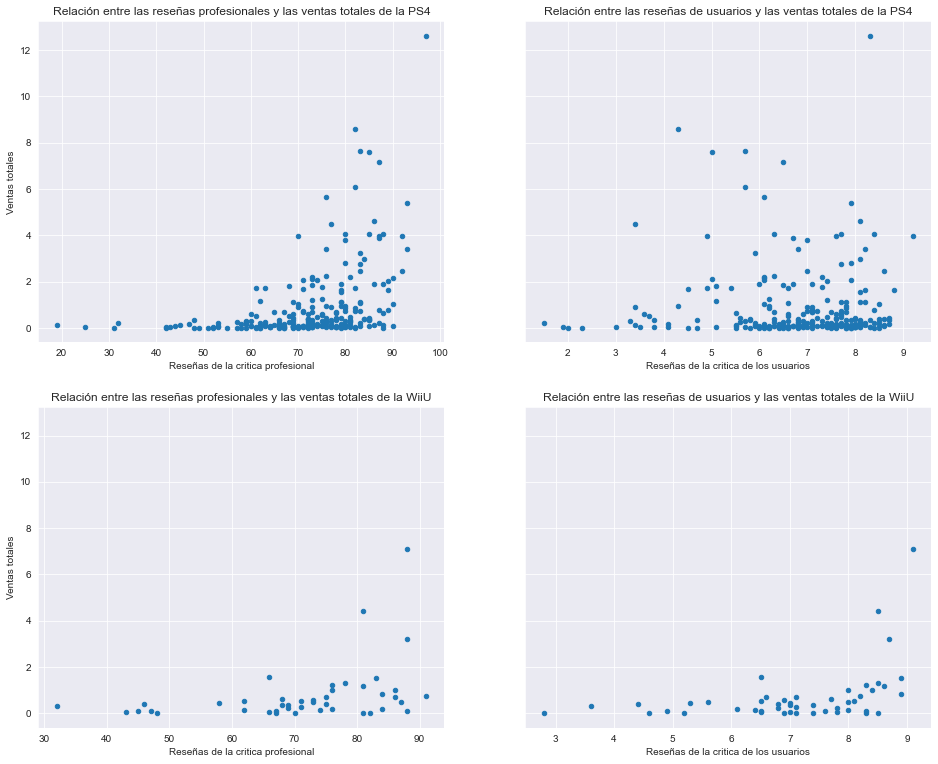

In [35]:
# Creamos un grafico de dispersión para ver la relación entre las variables
data_PS4 = data_modelo[data_modelo['platform'] == 'PS4']
data_Wii = data_modelo[data_modelo['platform'] == 'WiiU']
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 13), sharey=True)
# Graficas de PS3
data_PS4.plot(x='critic_score', y='total_sales', kind='scatter', ax=ax1)
ax1.set_title('Relación entre las reseñas profesionales y las ventas totales de la PS4')
ax1.set_xlabel('Reseñas de la critica profesional')
ax1.set_ylabel('Ventas totales')
data_PS4.plot(x='user_score', y='total_sales', kind='scatter', ax=ax2)
ax2.set_title('Relación entre las reseñas de usuarios y las ventas totales de la PS4')
ax2.set_xlabel('Reseñas de la critica de los usuarios')
# Graficas de Wii
data_Wii.plot(x='critic_score', y='total_sales', kind='scatter', ax=ax3)
ax3.set_title('Relación entre las reseñas profesionales y las ventas totales de la WiiU')
ax3.set_xlabel('Reseñas de la critica profesional')
ax3.set_ylabel('Ventas totales')
data_Wii.plot(x='user_score', y='total_sales', kind='scatter', ax=ax4)
ax4.set_title('Relación entre las reseñas de usuarios y las ventas totales de la WiiU')
ax4.set_xlabel('Reseñas de la critica de los usuarios')

In [36]:
# Sacamos la correlación de las variables
print('La correlación entre las reseñas de la critica profesional y las ventas totales del PS4 son:',
      data_PS4['total_sales'].corr(data_PS4['critic_score']))
print('La correlación entre las reseñas de la critica de los usuarios y las ventas totales del PS4 son:',
      data_PS4['total_sales'].corr(data_PS4['user_score']))
print()
print('La correlación entre las reseñas de la critica profesional y las ventas totales del WiiU son:',
      data_Wii['total_sales'].corr(data_Wii['critic_score']))
print('La correlación entre las reseñas de la critica de los usuarios y las ventas totales del WiiU son:',
      data_Wii['total_sales'].corr(data_Wii['user_score']))

La correlación entre las reseñas de la critica profesional y las ventas totales del PS4 son: 0.40266141068104083
La correlación entre las reseñas de la critica de los usuarios y las ventas totales del PS4 son: -0.040131589472697356

La correlación entre las reseñas de la critica profesional y las ventas totales del WiiU son: 0.370201412480884
La correlación entre las reseñas de la critica de los usuarios y las ventas totales del WiiU son: 0.4079264579217078


Analizando los gráficos y los resultados de correlación, podemo dar las siguientes conclusiones:

- La reseña de la crítica profesional en la plataforma de PS4 tiene una correlación positiva de 40% mientras que en la Wii presenta una correlación deL 37%. Apoyados de las graficas podemos ver que mientras en la plataforma de PS4 hay mayores ventas en las reseñas con mejor calificación, en la plataforma Wii están más dispersos.


- La reseña de la crítica de los usuarios en PS4 tiene una correlación positiva del cercana al 0% con respecto a las ventas totales mientras que la plataforma de Wii es del 40%, aqui podemos ver que en la caso de la WiiU las reseñas de los usuarios tienen más correlación que las reseñas de la critica profesional, sin embargo no es un aumento significativo. Y para el caso de la PS4 tenemos una correlación nula que es respalda por la grafica.


- Una vez viendo el panorama completo podemos asegurar que la critica profesional tiene mayor correlación con el precio, sin embargo no es demasiado fuerte. Consideamos que la critica debe ser una variable secundaria para el modelo del 2017

### Distribución por género

Para este apartado, analizaremos como se distribuyen los juegos por género, viendo el comportamiento de los géneros más rentables y como es la diferencia entre los géneros.

<AxesSubplot:title={'center':'Ventas totales por genero'}, xlabel='Genero', ylabel='Ventas Totales'>

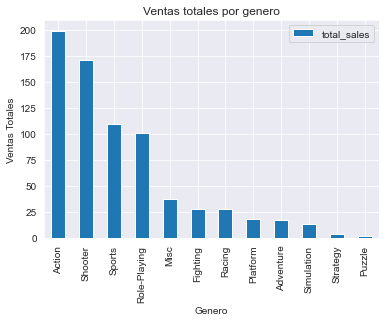

In [37]:
# Distribucion por genero
data_modelo.groupby('genre')['total_sales'].sum().reset_index().sort_values(by='total_sales',
                                                                            ascending=False).plot.bar(title='Ventas totales por genero',
                                                                                                      xlabel='Genero',
                                                                                                      ylabel='Ventas Totales',
                                                                                                     x= 'genre', y='total_sales')

Como podemos ver en la gráfica, nuestros géneros más rentables son el de Acción, seguido por el de Disparos y por último el de Deportes. A continuación, veremos como ha sido la distribución de los lanzamientos para estos géneros.

Text(0.5, 0.92, 'Distribución de lanzamientos por género más rentable a traves de los años')

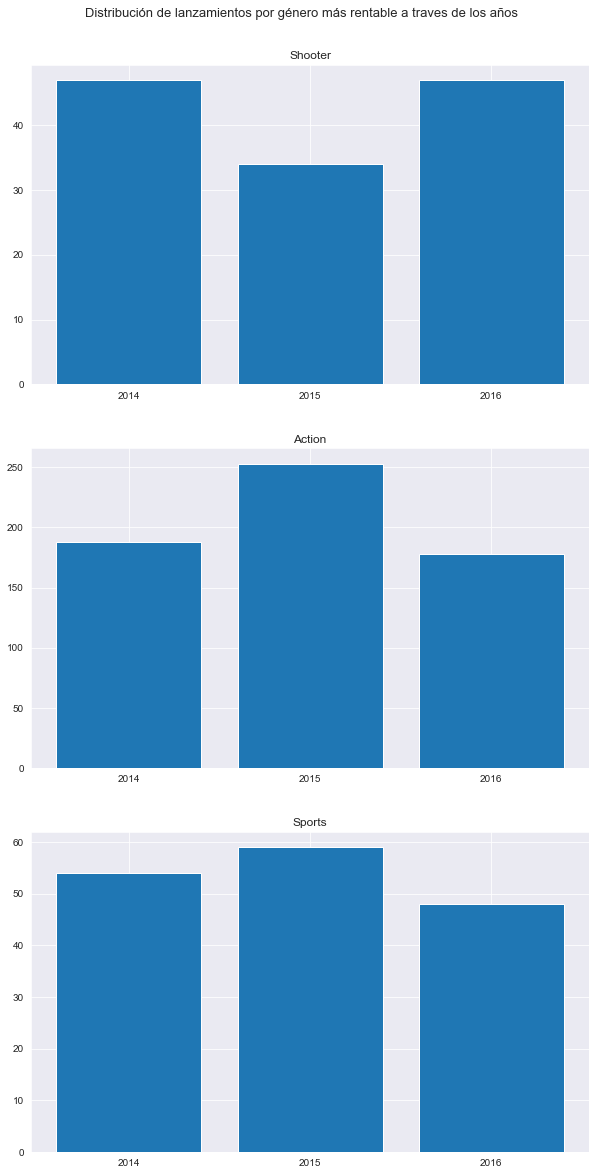

In [38]:
# Elegimos los generos más rentables (Action, Role-Playing, Adventure)
data_genre_profit = data_modelo[data_modelo['genre'].isin(['Action', 'Shooter', 'Sports'])]

# Histogramas de los generos más rentables
lista_generos = data_genre_profit.genre.unique()
fig, axs = plt.subplots(3, figsize=(10, 20))

x = 0
for genre in lista_generos:
    tabla_distribucion = data_modelo[data_modelo['genre'] == genre].groupby('year_of_release')['name'].count().reset_index()
    axs[x].bar(tabla_distribucion['year_of_release'], tabla_distribucion['name'])
    axs[x].set_title(genre)
    x += 1
        
fig.suptitle('Distribución de lanzamientos por género más rentable a traves de los años', y=0.92, fontsize=13)


Al observar las gráficas, podemos ver como los géneros de Action y Sports tuvieron un pico de popularidad de lanzamientos en 2015 y luego procedieron a bajar en 2016, mientras que el género de Shooter bajo sus lanzamientos en 2015 para luego recuperarse en 2016 

Para ver el panorama completo, veremos la distribución de los generos menos rentables.

Text(0.5, 0.92, 'Distribución de lanzamientos por género menos rentable a traves de los años')

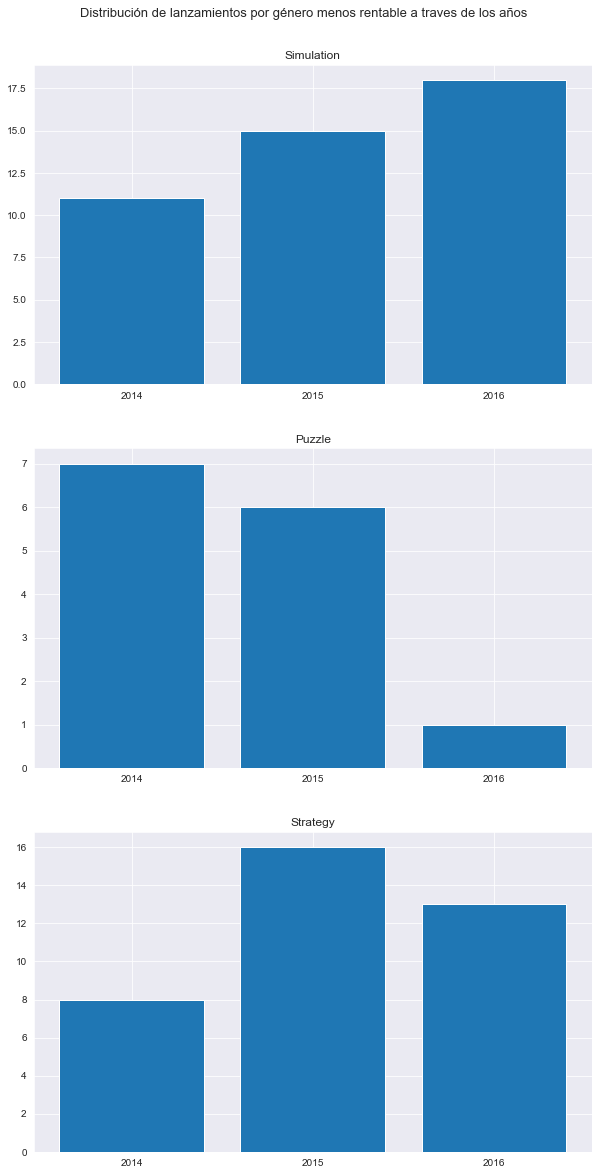

In [39]:
# Elegimos los generos menos rentables (Simulation, Puzzle, Strategy)
data_genre_less = data_modelo[data_modelo['genre'].isin(['Simulation', 'Puzzle', 'Strategy'])]

# Histogramas de los generos más rentables
lista_generos = data_genre_less.genre.unique()
fig, axs = plt.subplots(3, figsize=(10, 20))

x = 0
for genre in lista_generos:
    tabla_distribucion = data_modelo[data_modelo['genre'] == genre].groupby('year_of_release')['name'].count().reset_index()
    axs[x].bar(tabla_distribucion['year_of_release'], tabla_distribucion['name'])
    axs[x].set_title(genre)
    x += 1
        
fig.suptitle('Distribución de lanzamientos por género menos rentable a traves de los años', y=0.92, fontsize=13)

Para los géneros menos rentables, podemos observar lo siguiente:
- El género de Simulation a pesar de ser de los menos rentables va subiendo su popularidad de lanzamientos cada año. 
- El género de Puzzle presenta un tendencia a bajar de popularidad cada año con una caida drastica para 2016
- El género de Strategy pego un salto en popularidad en 2015, sin embargo no mantuvo esa tendencia para el año 2016

## Perfil de usuario para cada región

Una vez realizado algunos análisis de nuestros datos y su relación entre ellos, vamos a generar un perfil de usuario para cada región. Esto es con el objetivo de generar los siguientes insights:

- Las cinco plataformas principales por región y analizar sus variaciones en cuotas de mercado
- Los cinco géneros principales y ver sus principales diferencias
- Analizar si la clasificación ESRB afecta a las ventas de cada región.

### Top 5 plataformas principales por region

<AxesSubplot:title={'center':'Cuota de marcado de NA por plataforma'}, xlabel='platform'>

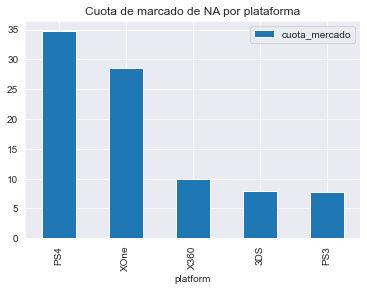

In [40]:
## Top 5 plataformas principales por region

# Top 5 plataformas para NA
top5_na_platform = data_modelo.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).reset_index(drop=True).loc[0:4]
top5_na_platform['cuota_mercado'] = (top5_na_platform.na_sales / data_modelo.na_sales.sum()) * 100
top5_na_platform.plot.bar(x='platform', y='cuota_mercado', title='Cuota de marcado de NA por plataforma')

<AxesSubplot:title={'center':'Cuota de marcado de EU por plataforma'}, xlabel='platform'>

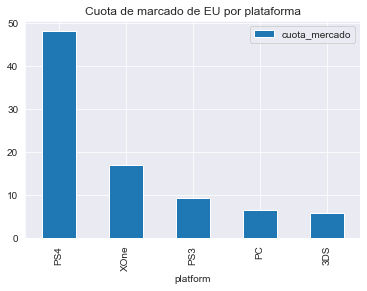

In [41]:
# Top 5 plataformas para EU
top5_eu_platform = data_modelo.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).reset_index(drop=True).loc[0:4]
top5_eu_platform['cuota_mercado'] = (top5_eu_platform.eu_sales / data_modelo.eu_sales.sum()) * 100
top5_eu_platform.plot.bar(x='platform', y='cuota_mercado', title='Cuota de marcado de EU por plataforma')

<AxesSubplot:title={'center':'Cuota de marcado de JP por plataforma'}, xlabel='platform'>

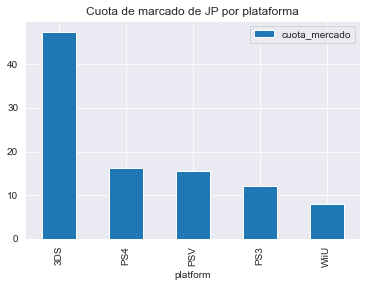

In [42]:
# Top 5 plataformas para JP
top5_jp_platform = data_modelo.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).reset_index(drop=True).loc[0:4]
top5_jp_platform['cuota_mercado'] = (top5_jp_platform.jp_sales / data_modelo.jp_sales.sum()) * 100
top5_jp_platform.plot.bar(x='platform', y='cuota_mercado', title='Cuota de marcado de JP por plataforma')

Una vez generadas las tablas con las plataformas principales y su cuota del mercado, podemos generar las siguientes conclusiones:

- Para la region de NA, las plataformas de PS4 y XOne son las que lideran el mercado de esta región con más del 60% de cuota entre las 2, para la región de EU la plataforma de PS4 domina en solitario abarcando el casi el 50% del total del mercado de la región. Sin embargo, al llegar a la región de JP la plataforma de 3DS domina el mercado con un 47.5% de cuota, en esta región la plataforma de XOne ni siquiera esta en el top 5.

- La plataforma de PS4 tiene la mayor cuota de mercado tanto para la region de NA como la de EU. Para la region de JP esta en el segundo puesto con un 15% de la cuota total. Podemos tambien observar que en esta region hay una clara predilección por plataformas de Sony y Nintendo; ambas empresas japonesas.

- La region JP tiene una mayor predilección por plataformas moviles (3DS y PSV) mientras que las regiones de EU y NA tienen mayor preferencia por consolas de sobremesa (XOne y PS4).

### Top 5 generos principales por region

<AxesSubplot:title={'center':'Ventas totales de NA por género'}, xlabel='genre'>

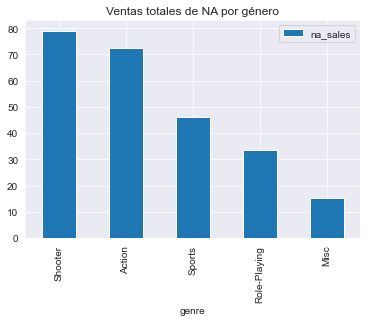

In [43]:
## Top 5 generos principales por region

# Top 5 generos para NA
top5_na_genre = data_modelo.groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).reset_index(drop=True).loc[0:4]
top5_na_genre.plot.bar(x='genre', y='na_sales', title='Ventas totales de NA por género')

<AxesSubplot:title={'center':'Ventas totales de EU por género'}, xlabel='genre'>

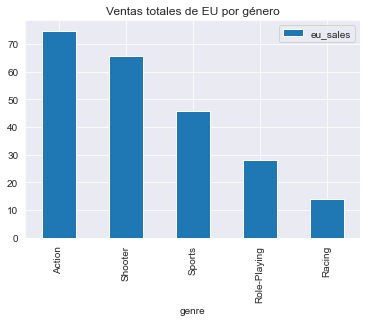

In [44]:
# Top 5 generos para EU
top5_eu_genre = data_modelo.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).reset_index(drop=True).loc[0:4]
top5_eu_genre.plot.bar(x='genre', y='eu_sales', title='Ventas totales de EU por género')

<AxesSubplot:title={'center':'Ventas totales de JP por género'}, xlabel='genre'>

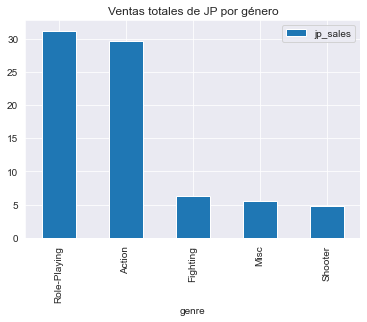

In [45]:
# Top 5 generos para JP
top5_jp_genre = data_modelo.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).reset_index(drop=True).loc[0:4]
top5_jp_genre.plot.bar(x='genre', y='jp_sales', title='Ventas totales de JP por género')

En el tema de generos por region, podemos generar las siguientes conclusiones:

- Para las regiones de NA y EU nuestro top 3 generos anteriormente identificado se mantiene, con el género de acción siendo el principal para ambas regiones. La única diferencia que presentan es que en NA para el top 5 tenemos el género de Misc mientras que para EU tenemos el de Racing.

- Para la region de JP tenemos que el género principal es el de Role-Playing dejando a los generos de Action y Shooter como 2do y 5to del top. Otro dato a considerar es que el género de Fighting se uno al top en esta región en comparación a NA y EU.

### Analisis de la clasificación respecto a las ventas

<AxesSubplot:title={'center':'Ventas totales de NA por rating'}, ylabel='rating'>

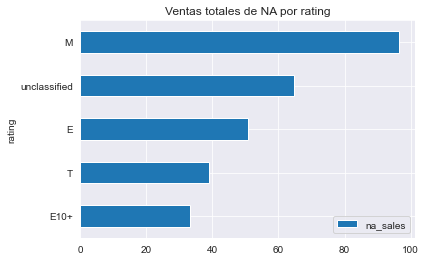

In [46]:
## Agrupamos los datos dependiendo de la clasificación por region

# Region NA
na_rating = data_modelo.groupby('rating')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=True).reset_index(drop=True)
na_rating.plot.barh(x='rating', y='na_sales', title='Ventas totales de NA por rating')

<AxesSubplot:title={'center':'Ventas totales de EU por rating'}, ylabel='rating'>

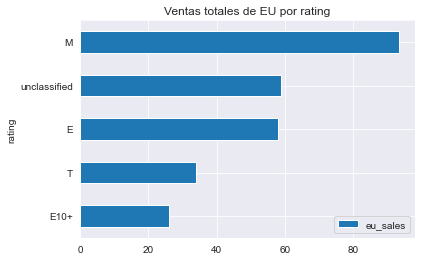

In [47]:
# Region EU
eu_rating = data_modelo.groupby('rating')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=True).reset_index(drop=True)
eu_rating.plot.barh(x='rating', y='eu_sales', title='Ventas totales de EU por rating')

<AxesSubplot:title={'center':'Ventas totales de JP por rating'}, ylabel='rating'>

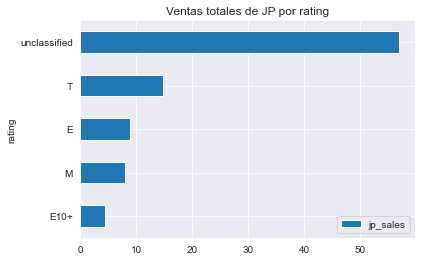

In [48]:
jp_rating = data_modelo.groupby('rating')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=True).reset_index(drop=True)
jp_rating.plot.barh(x='rating', y='jp_sales', title='Ventas totales de JP por rating')

Una vez generadas las tablas, podemos compartir las siguientes conclusiones:

- La clasificación no afecta para las regiones de NA y EU, ya que el rating M se mantiene como el de mayor ventas incluso superior que el rating T (apto para todo público)

- Para el área de JP podemos observar como un gran porcentaje de las ventas vienen de juegos que no tienen clasificación y tambien podemos observar que los juegos con rating M bajan mucho de puesto en comparación a las otras regiones. Tambien podemos notar que los juegos con rating T son los segundos mejores clasificados.

- En las 3 regiones, los juegos clasificados como E10+ son los que menos ventas reportan.

## Prueba de hipotesis

Para nuestro ultimo apartado, tenemos unas cuantas hipotesis que deberemos probar y con base a los resultados daremos insights que puedan ayudarnos en nuestras conclusiones finales.

Las hipótesis a probar son las siguientes:

1. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
2. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

### Primera hipotesis

Para nuestra primera hipótesis a probar, tenemos lo siguiente:
- Hipotesis nula: `Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas`
- Hipotesis alternativa: `Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes`
Para ello, ocuparemos la formula de la hipótesis sobre la igualdad de las medias de dos poblaciones y la prueba de Levene con un nivel de significancia estadistica critico del 5%.

In [49]:
# Seleccionamos la data de Xbox One
data_XOne = data_modelo.query("platform == 'XOne' & user_score > 0")['user_score']

# Seleccionamos la data de PC
data_PC = data_modelo.query("platform == 'PC' & user_score > 0")['user_score']

alpha = 0.05 # el nivel de significancia estadística crítica

# Prueba Levene
results_levene = st.levene(data_XOne, data_PC)

if results_levene.pvalue < alpha:
    equal_var=False
else:
    equal_var=True
    
print('El valor de equal_var es:', equal_var)
    
# Prueba T

results = st.ttest_ind(data_XOne, data_PC, equal_var=equal_var)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

El valor de equal_var es: False
p-value:  0.11601398086668832
No rechazamos la hipótesis nula


Una vez realizado el test, tenemos el siguiente resultado:

- El resultado nos dice que aunque las cantidades promedio son diferentes, existe un 11% de probabilidad de obtener aleatoriamente una diferencia aleatoria de ese tamaño o mayor. Esta probabilidad supera nuestro nivel de significancia estadistica por lo que no podemos concluir que existe una diferencia significativa entre los promedios de los usuarios entre ambas plataformas.

### Segunda hipotesis

Para nuestra segunda hipótesis a probar, tenemos lo siguiente:
- Hipotesis nula: `Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas.`
- Hipotesis alternativa: `Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.`
Para ello, ocuparemos la formula de la hipótesis sobre la igualdad de las medias de dos poblaciones y la prueba de Levene con un nivel de significancia estadistica critico del 5%.

In [50]:
# Seleccionamos la data del género de acción
data_action = data_modelo.query("genre == 'Action' & user_score > 0")['user_score']

# Seleccionamos la data del género de deportes
data_sports = data_modelo.query("genre == 'Sports' & user_score > 0")['user_score']

alpha = 0.05 # el nivel de significancia estadística crítica
# si el valor p es menor que alfa, rechazamos la hipótesis

# Prueba Levene
results_levene = st.levene(data_action, data_sports)

if results_levene.pvalue < alpha:
    equal_var=False
else:
    equal_var=True
    
print('El valor de equal_var es:', equal_var)
    
# Prueba T

results = st.ttest_ind(data_action, data_sports, equal_var=equal_var)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

El valor de equal_var es: False
p-value:  1.1825550382644557e-14
Rechazamos la hipótesis nula


Una vez realizado el test, tenemos el siguiente resultado:

- El resultado nos dice que las cantidades promedio son diferentes y que existe un probabilidad infima de obtener aleatoriamente una diferencia aleatoria de ese tamaño o mayor. Esta probabilidad es menor a nuestro nivel de significancia estadistica por lo que podemos concluir que existe una diferencia significativa entre los promedios de los usuarios entre ambos géneros.

## Conclusiones generales

Recopilando todos nuestros análisis y conclusiones intermedias; teniendo en cuenta nuestro objetivo principal de identificar patrones que nos permitan identificar si un juego tendra éxito o no, presentamos nuestras conclusiones finales del análisis.

- Los videojuegos lanzados en consolas de Sony historicamente han sido los que mayores ventas han generado, y con miras al 2017, la plataforma de PS4 tiene una muy fuerte presencia en las regiones de NA, EU y JP; dominando en la primera posición del mercado en las primeras 2 regiones y siendo la segunda mayor valorada en JP.

- En general las plataformas tienen periodos de vida de 8 a 10 años y las nuevas generaciones salen 2 años antes de que las antiguas dejen de estar en circulación, por lo que para 2017 se recomienda enfocarse principalmente en consolas de nueva generación ya que estas salieron en 2015.

- Existe una correlación positiva entre los score de la critica profesional y las ventas de los videojuegos, sin embargo al ser una correlación debil se recomienda que se considere como una métrica secundaria para un modelo con miras a 2017

- Los géneros más rentables han sido los de Action, Sports y Shooter. Los generos con menos ventas han sido los de Strategy, Puzzle y Adventure. Sin embargo, para el área de JP se deben considerar los géneros de Fighting y Roleplaying ya que estos son de los más rentables en esta región.

- La region JP tiene una mayor predilección por plataformas moviles (3DS y PSV) mientras que las regiones de EU y NA tienen mayor preferencia por consolas de sobremesa (XOne y PS4).

- Las clasificaciones no afectan de manera negativa a las ventas en las regiones de NA y EU siendo el rating M el que mayor ventas genera, sin embargo en la region JP este rating es de los menos rentables. Para las 3 regiones, el genero E10+ es el que menor valorado esta.